In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
from time import time

In [2]:
#Read images
img1= cv2.imread('/media/harish/New Volume/IVP FIles/Assignment1/Rose.jpg', 0)
img2= cv2.imread('/media/harish/New Volume/IVP FIles/Assignment1/lenna.tif', 0)

In [3]:
def own_function(img, threshold):
    img[img>threshold] = 255
    img[img!=255] = 0
    return img

def for_loop(img, threshold):
    canvas = np.zeros(img.shape)
    for i in tqdm(range(img.shape[0]), desc = 'Thresholding Image', ncols = 100):
        for j in range(img.shape[1]):
            if img[i][j] >= threshold:
                canvas[i][j] = 255
            else:
                canvas[i][j] = 0
    return canvas

def opencv_function(img, threshold):
    _, thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return thresh

In [15]:
process_order = ['Own Function', 'For Loop Method', 'Opencv Function']

Thresholding Image: 100%|███████████████████████████████████████| 360/360 [00:00<00:00, 1252.45it/s]


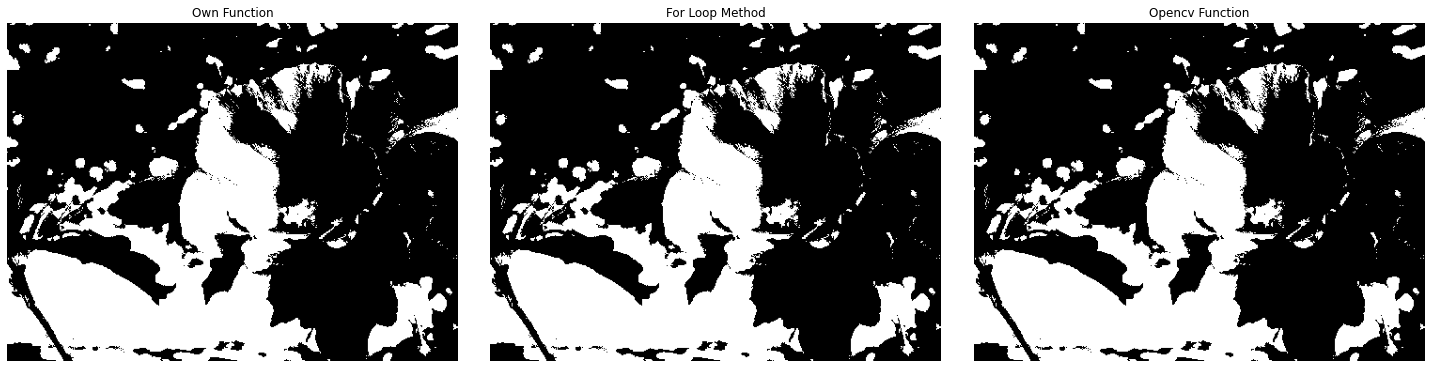

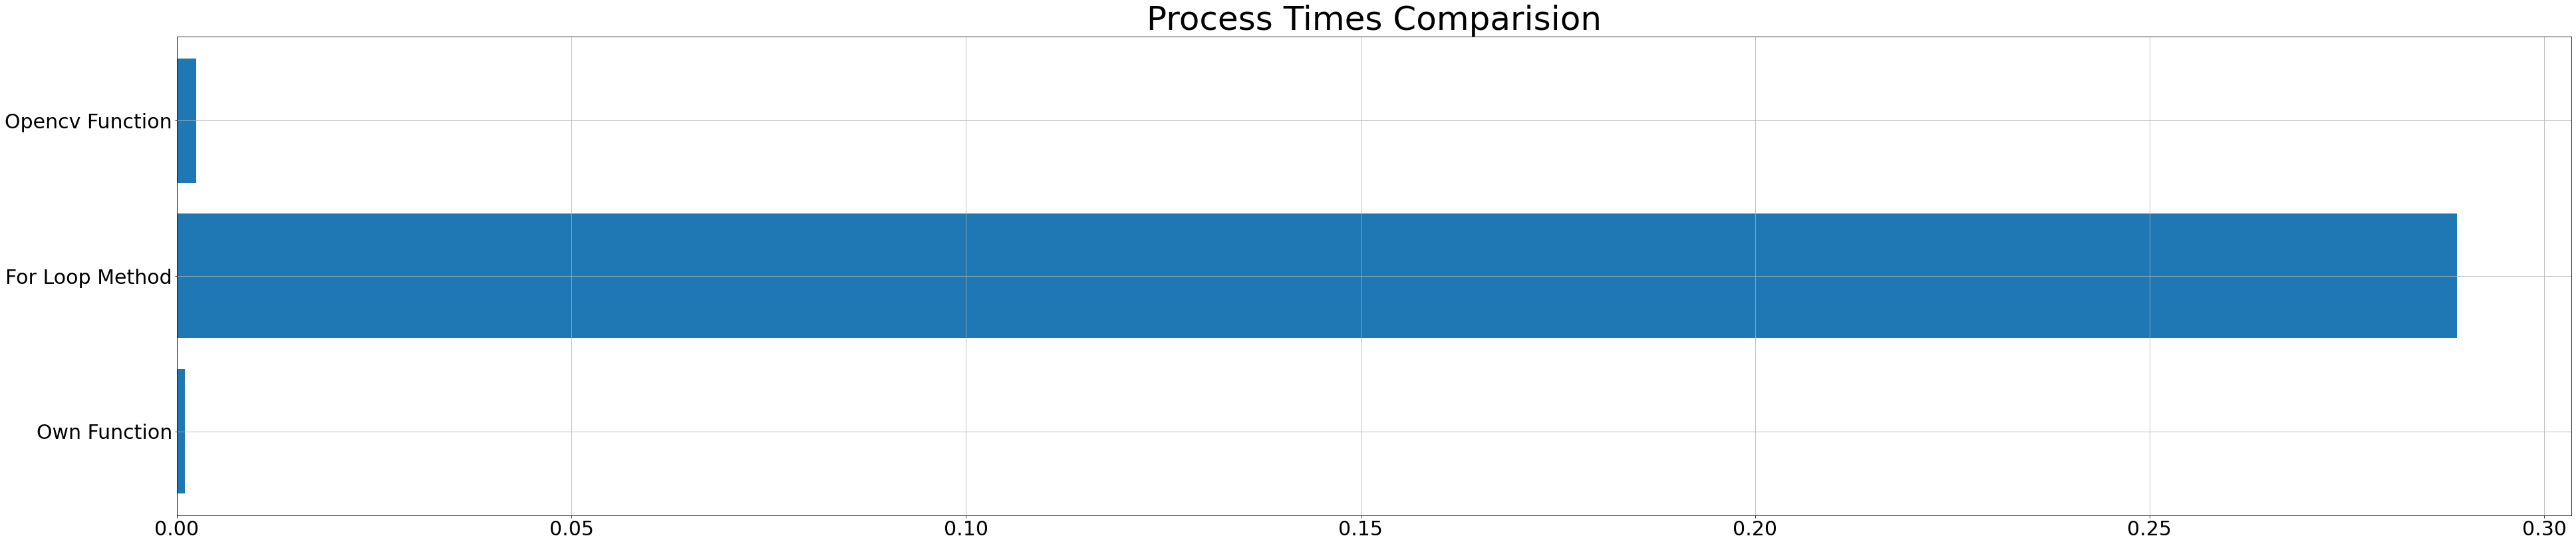

In [28]:
#Rose Image
Rose_images = []
Rose_process_times = []

img = img1 
threshold = 127

tick = time()
result = own_function(img, threshold)
tock = time()
Rose_images.append(result)
Rose_process_times.append(tock - tick)

tick = time()
result = for_loop(img, threshold)
tock = time()
Rose_images.append(result)
Rose_process_times.append(tock - tick)

tick = time()
result = opencv_function(img, threshold)
tock = time()
Rose_images.append(result)
Rose_process_times.append(tock - tick)

fig, ax = plt.subplots(1, 3, figsize = (20, 5), constrained_layout = True)
for i in range(3):
    ax[i].imshow(Rose_images[i], cmap = 'gray')
    ax[i].set_title(process_order[i])
    ax[i].axis('off')
plt.show()
plt.close()

fig = plt.figure(figsize = (50, 10))
ax = fig.add_axes([0,0,1,1])
ax.barh(process_order,Rose_process_times)
ax.grid('on')
ax.tick_params(axis = 'both', labelsize = 30)
plt.title('Process Times Comparision', fontsize = 50)
plt.show()

Thresholding Image: 100%|███████████████████████████████████████| 512/512 [00:00<00:00, 1151.02it/s]


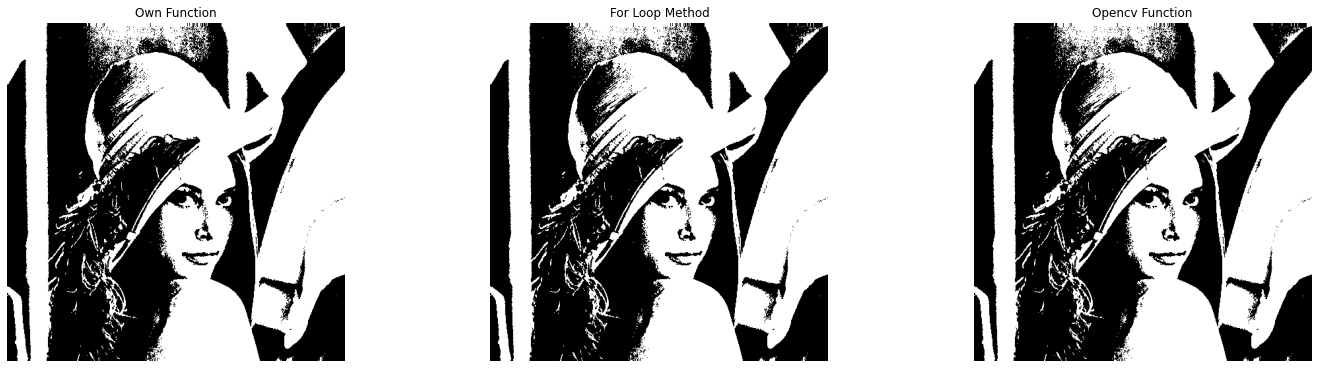

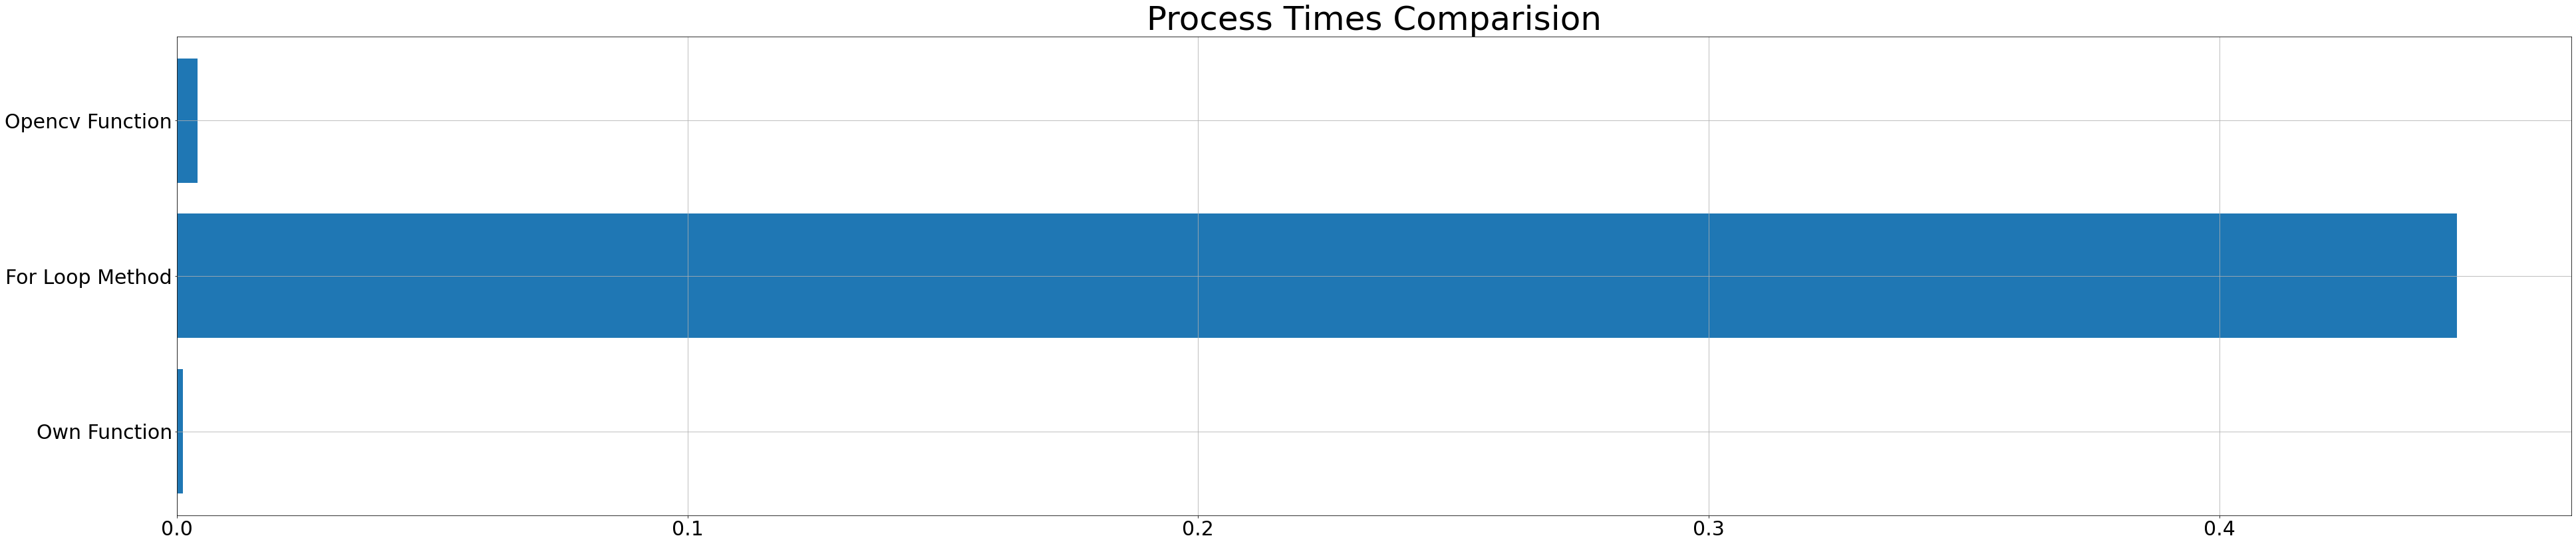

In [27]:
Lena_images = []
Lena_process_times = []

img = img2 
threshold = 127

tick = time()
result = own_function(img, threshold)
tock = time()
Lena_images.append(result)
Lena_process_times.append(tock - tick)

tick = time()
result = for_loop(img, threshold)
tock = time()
Lena_images.append(result)
Lena_process_times.append(tock - tick)

tick = time()
result = opencv_function(img, threshold)
tock = time()
Lena_images.append(result)
Lena_process_times.append(tock - tick)

fig, ax = plt.subplots(1, 3, figsize = (20, 5), constrained_layout = True)
for i in range(3):
    ax[i].imshow(Lena_images[i], cmap = 'gray')
    ax[i].set_title(process_order[i])
    ax[i].axis('off')
plt.show()
plt.close()

fig = plt.figure(figsize = (50, 10))
ax = fig.add_axes([0,0,1,1])
ax.barh(process_order,Lena_process_times)
ax.tick_params(axis = 'both', labelsize = 30)
ax.grid('on')
plt.title('Process Times Comparision', fontsize = 50)
plt.show()